## 히스토그램 (p.152~)
- review

(256, 1)
270000.0 (450, 600)


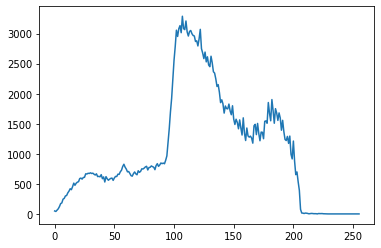

In [1]:
# p.153 histogram
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('./img/mountain.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

# hist 계산 및 그리기
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)

print(hist.shape)
print(hist.sum(), img.shape)
plt.show()

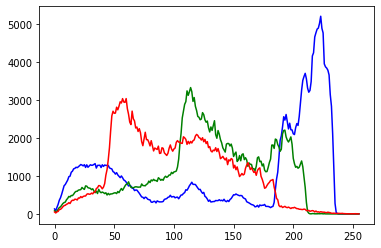

In [2]:
# p.154 color histogram
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('./img/mountain.jpg')
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

# hist 계산 및 그리기
channels = cv2.split(img)
colors = ('b', 'g', 'r')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)

plt.show()

## Normalize (p.155~)
- 분포가 한 곳에 집중되어 있는 경우에 효과적

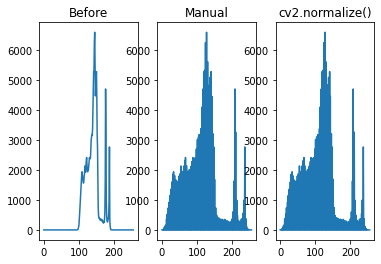

In [3]:
# p.156 histogram normalize
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 그레이 스케일로 이미지 읽기
img = cv2.imread('./img/abnormal.jpg', cv2.IMREAD_GRAYSCALE)

# 정규화
img_f = img.astype(np.float32)
img_norm = ((img_f - img_f.min())* (255) / (img_f.max() - img_f.min()))
img_norm = img_norm.astype(np.uint8)

# opencv API를 이용한 정규화
img_norm2 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

# histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 255])
hist_norm = cv2.calcHist([img_norm], [0], None, [256], [0, 255])
hist_norm2 = cv2.calcHist([img_norm2], [0], None, [256], [0, 255])

cv2.imshow('Before', img)
cv2.imshow('Manual', img_norm)
cv2.imshow('cv2.normalize', img_norm2)
cv2.waitKey()
cv2.destroyAllWindows()

# hist 계산 및 그리기
hist = {'Before': hist, 'Manual': hist_norm, 'cv2.normalize()': hist_norm2}
for i, (k, v) in enumerate(hist.items()):
    plt.subplot(1, 3, i+1)
    plt.title(k)
    plt.plot(v)

plt.show()

## 이퀄라이즈 (p.158~)
- 집중된 영역에서 멀리 떨어진 값이 있을 경우에 효과가 있음 (평탄화)

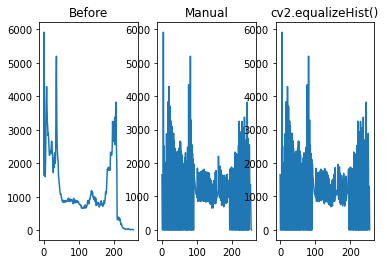

In [6]:
# p.159 histogram equalizer
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 그레이 스케일로 이미지 읽기
img = cv2.imread('./img/yate.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape[:2]

# equalize
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m-cdf_m.min()) / (rows*cols)*255
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
img2 = cdf[img]

# opencv API 정규화
img3 = cv2.equalizeHist(img)

# histogram
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 255])
hist3 = cv2.calcHist([img3], [0], None, [256], [0, 255])

# 결과
cv2.imshow('Before', img)
cv2.imshow('Manual', img2)
cv2.imshow('cv2.equalizeHist()', img3)
cv2.waitKey()
cv2.destroyAllWindows()

# hist 계산 및 그리기
hist = {'Before': hist, 'Manual': hist2, 'cv2.equalizeHist()': hist3}
for i, (k, v) in enumerate(hist.items()):
    plt.subplot(1, 3, i+1)
    plt.title(k)
    plt.plot(v)

plt.show()

In [ ]:
# p.160 color histogram equalizer
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 그레이 스케일로 이미지 읽기
img = cv2.imread('./img/yate.jpg')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# equalize
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:, :, 0])

img2 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

# 결과
cv2.imshow('Before', img)
cv2.imshow('After', img2)
cv2.waitKey()
cv2.destroyAllWindows()

# CLAHE
- 노이즈 증폭 방지
- 히스토그램에서 제한된 계급이나 값을 넘으면 다른 계급으로 배분 후, 이퀄라이즈 적용
- clipLimit : 제한 경계 값 (defualt=40)

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/bright.jpg')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# 이퀄라이즈 적용
img_eq = img_yuv.copy()
img_eq[:, :, 0] = cv2.equalizeHist(img_eq[:, :, 0])
img_eq = cv2.cvtColor(img_eq, cv2.COLOR_YUV2BGR)

# CLAHE 적용
img_clahe = img_yuv.copy()
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))
img_clahe[:, :, 0] = clahe.apply(img_clahe[:, :, 0])
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)

# result
cv2.imshow('Before', img)
cv2.imshow('CLAHE', img_clahe)
cv2.imshow('equalizeHist', img_eq)
cv2.waitKey()
cv2.destroyAllWindows()

## 2D Histogram
- 2개의 축을 이용
- 아래의 그래프중 왼쪽 그래프는 Blue와 Green이 x=15, y=25에서 값이 1만 이상으로 붉게 표시 되어짐

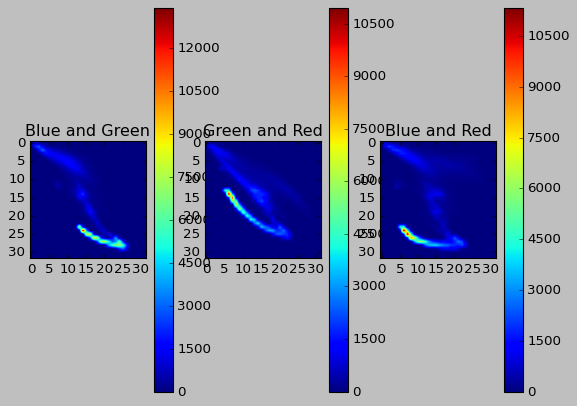

In [19]:
import cv2
import matplotlib.pyplot as plt

plt.style.use('classic')
img = cv2.imread('img/mountain.jpg')
cv2.imshow('Mountain', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.subplot(131)
hist = cv2.calcHist([img], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = plt.imshow(hist)
plt.title('Blue and Green')
plt.colorbar(p)

plt.subplot(132)
hist = cv2.calcHist([img], [1, 2], None, [32, 32], [0, 256, 0, 256])
p = plt.imshow(hist)
plt.title('Green and Red')
plt.colorbar(p)

plt.subplot(133)
hist = cv2.calcHist([img], [0, 2], None, [32, 32], [0, 256, 0, 256])
p = plt.imshow(hist)
plt.title('Blue and Red')
plt.colorbar(p)

plt.show()

# 역투영
- HSV 컬러스페이스를 이용하면 색상으로 특정 물체나 사물의 일부분을 배경에서 분리할 수 있음
- 배경의 색깔이 명확히 차이가 나야 효과가 있음

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

win_name = 'back_projection'
img = cv2.imread('./img/pump_horse.jpg')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
draw = img.copy()

#--⑤ 역투영된 결과를 마스킹해서 결과를 출력하는 공통함수
def masking(bp, win_name):
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    cv2.filter2D(bp,-1,disc,bp)
    _, mask = cv2.threshold(bp, 1, 255, cv2.THRESH_BINARY)
    result = cv2.bitwise_and(img, img, mask=mask)
    cv2.imshow(win_name, result)

#--⑥ 직접 구현한 역투영 함수
def backProject_manual(hist_roi):
    #--⑦ 전체 영상에 대한 H,S 히스토그램 계산
    hist_img = cv2.calcHist([hsv_img], [0,1], None,[180,256], [0,180,0,256])
    #--⑧ 선택영역과 전체 영상에 대한 히스토그램 그램 비율계산
    hist_rate = hist_roi/ (hist_img + 1)
    #--⑨ 비율에 맞는 픽셀 값 매핑
    h,s,v = cv2.split(hsv_img)
    bp = hist_rate[h.ravel(), s.ravel()]
    bp = np.minimum(bp, 1)
    bp = bp.reshape(hsv_img.shape[:2])
    cv2.normalize(bp,bp, 0, 255, cv2.NORM_MINMAX)
    bp = bp.astype(np.uint8)
    #--⑩ 역 투영 결과로 마스킹해서 결과 출력
    masking(bp,'result_manual')
 
# OpenCV API로 구현한 함수 ---⑪ 
def backProject_cv(hist_roi):
    # 역투영 함수 호출 ---⑫
    bp = cv2.calcBackProject([hsv_img], [0, 1], hist_roi,  [0, 180, 0, 256], 1)
    # 역 투영 결과로 마스킹해서 결과 출력 ---⑬ 
    masking(bp,'result_cv')

# ROI 선택 ---①
(x,y,w,h) = cv2.selectROI(win_name, img, False)
if w > 0 and h > 0:
    roi = draw[y:y+h, x:x+w]
    cv2.rectangle(draw, (x, y), (x+w, y+h), (0,0,255), 2)
    #--② 선택한 ROI를 HSV 컬러 스페이스로 변경
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    #--③ H,S 채널에 대한 히스토그램 계산
    hist_roi = cv2.calcHist([hsv_roi],[0, 1], None, [180, 256], [0, 180, 0, 256] )
    #--④ ROI의 히스토그램을 매뉴얼 구현함수와 OpenCV 이용하는 함수에 각각 전달
    backProject_manual(hist_roi)
    backProject_cv(hist_roi)
    
cv2.imshow(win_name, draw)
cv2.waitKey()
cv2.destroyAllWindows()

# Histogram 비교
- cv2.HISTCMP_CORREL : 상관관계 (1: 완전일치, -1 :최대 불일치, 0: 무관계)
- cv2.HISTCMP_CHISQR : 카이제곱 (0: 완전일치, 큰 값 :최대 불일치)
- cv2.HISTCMP_INTERSECT : 교차 (1: 완전일치, 0 :최대 불일치)
- cv2.HISTCMP_BHATTACHARYYA : 바타차야 (0: 완전일치, 1 :최대 불일치)

CORREL	img1: 1.0	
img2: 0.6972401010509665	
img3: 0.5558093406119815	
img4: 0.22891892660032642	
CHISQR	img1: 0.0	
img2: 67.327453515038	
img3: 35.70699449240709	
img4: 1129.490072366738	
INTERSECT	img1: 1.0000000265276545	
img2: 0.5419010928423639	
img3: 0.39832053976675424	
img4: 0.18116670371464172	
BHATTACHARYYA	img1: 1.0536712127723509e-08	
img2: 0.4823957738903206	
img3: 0.4732699692836066	
img4: 0.7939287429950579	


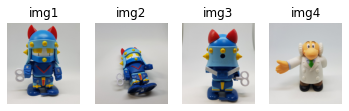

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('./img/taekwonv1.jpg')
img2 = cv2.imread('./img/taekwonv2.jpg')
img3 = cv2.imread('./img/taekwonv3.jpg')
img4 = cv2.imread('./img/dr_ochanomizu.jpg')

cv2.imshow('query', img1)
cv2.waitKey()
cv2.destroyAllWindows()

imgs = [img1, img2, img3, img4]
hists = []

for i, img in enumerate(imgs):
    plt.subplot(1, len(imgs), i+1)
    plt.title(f'img{i+1}')
    plt.axis('off')
    plt.imshow(img[:, :, ::-1])
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    hists.append(hist)

query = hists[0]
methods = {'CORREL': cv2.HISTCMP_CORREL, 'CHISQR': cv2.HISTCMP_CHISQR, 'INTERSECT': cv2.HISTCMP_INTERSECT,
            'BHATTACHARYYA': cv2.HISTCMP_BHATTACHARYYA}
for j, (name, flag) in enumerate(methods.items()):
    print(f'{name}', end='\t')
    for i, (hist, img) in enumerate(zip(hists, imgs)):
        ret = cv2.compareHist(query, hist, flag)
        if flag == cv2.HISTCMP_INTERSECT:
            ret = ret/np.sum(query)
        print(f'img{i+1}: {ret}', end='\t')
        print()

plt.show()

# Example

In [4]:
import cv2
import numpy as np

# 알파블렌딩의 범위로 15% 지정
alpha_width_rate = 15

# 이미지
img_face = cv2.imread('img/man_face.jpg')
img_skull = cv2.imread('img/skull.jpg')

# 결과 영상 준비
img_comp = np.zeros_like(img_face)

# 이미지 좌표 계산
height, width = img_face.shape[:2]
# img_face.shape : (475, 640, 3)
middle = width//2
alpha_width = width * alpha_width_rate // 100
start = middle - alpha_width//2
step = 100/alpha_width

# 입력 이미지 절반씩 결과영상에 합성
img_comp[:, :middle, :] = img_face[:, :middle, :].copy()
img_comp[:, middle:, :] = img_skull[:, middle:, :].copy()
cv2.imshow('half', img_comp)

for i in range(alpha_width+1):
    alpha = (100 - step*i)/100
    beta = 1 - alpha
    img_comp[:, start+i] = img_face[:, start+i]*alpha +img_skull[:, start+i]*beta
    print(i, alpha, beta)

cv2.imshow('half skull', img_comp)
cv2.waitKey()
cv2.destroyAllWindows()

0 1.0 0.0
1 0.9895833333333333 0.01041666666666674
2 0.9791666666666667 0.02083333333333326
3 0.96875 0.03125
4 0.9583333333333333 0.04166666666666674
5 0.9479166666666667 0.05208333333333326
6 0.9375 0.0625
7 0.9270833333333333 0.07291666666666674
8 0.9166666666666667 0.08333333333333326
9 0.90625 0.09375
10 0.8958333333333333 0.10416666666666674
11 0.8854166666666667 0.11458333333333326
12 0.875 0.125
13 0.8645833333333333 0.13541666666666674
14 0.8541666666666667 0.14583333333333326
15 0.84375 0.15625
16 0.8333333333333333 0.16666666666666674
17 0.8229166666666665 0.17708333333333348
18 0.8125 0.1875
19 0.8020833333333333 0.19791666666666674
20 0.7916666666666665 0.20833333333333348
21 0.78125 0.21875
22 0.7708333333333333 0.22916666666666674
23 0.7604166666666665 0.23958333333333348
24 0.75 0.25
25 0.7395833333333333 0.26041666666666674
26 0.7291666666666665 0.2708333333333335
27 0.71875 0.28125
28 0.7083333333333333 0.29166666666666674
29 0.6979166666666665 0.3020833333333335
30 0

In [1]:
import cv2
import numpy as np

# 감도 설정
thresh = 25     # 달라진 픽셀 값 기준치 설정
max_diff = 5    # 달라진 픽셀 갯수 기준치 설정

# camera caption
a, b, c = None, None, None
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 480)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 320)

if cap.isOpened():
    ret, a = cap.read() # a frame read
    ret, b = cap.read() # b frame read

    while ret:
        ret, c = cap.read() # c frame read
        draw = c.copy()
        if not ret:
            break

        # 3개의 영상 그레이스케일로 변경
        a_gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        b_gray = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
        c_gray = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY)

# a-b, b-c 절대값 구하기
diff1 = cv2.absdiff(a_gray, b_gray)
diff2 = cv2.absdiff(b_gray, c_gray)

# 스레시홀드로 기준치 이내의 차이는 무시
ret, diff1_t = cv2.threshold(diff1, thresh, 255, cv2.THRESH_BINARY)
ret, diff2_t = cv2.threshold(diff2, thresh, 255, cv2.THRESH_BINARY)

# 두 차이에 대해 and 연산 (두 영상의 차이가 모두 발견된 경우)
diff = cv2.bitwise_and(diff1_t, diff2_t)

# 열림 연산으로 노이즈 제거
k = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
diff = cv2.morphologyEx(diff, cv2.MORPH_OPEN, k)

diff_cnt = cv2.countNonZero(diff)
if diff_cnt > max_diff:
    nzero = np.nonzero(diff)
    cv2.rectangle(draw, (min(nzero[1]), min(nzero[0])), (max(nzero[1]), max(nzero[0])), (0, 255, 0), 2)
    cv2.putText(draw, 'Motion Detected', (10, 30), cv2.FONT_HERSHEY_DUPLEX, 0.5, (0, 0, 255))


stacked = np.hstack((draw, cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)))
cv2.imshow('motion sensor', stacked)

a = b
b = c

if cv2.waitKey(1) & 0xFF ==27:
    break